In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from pylab import rcParams

# The Data
[Read about the data here](https://www.kaggle.com/lava18/google-play-store-apps)

In [3]:
df = pd.read_csv("data/googleplaystore.csv")
display(df.head())

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
#Data Cleaning

def remove_postfix(column):
    column=column.str.replace('+','')
    column=column.str.replace(',','')
    column=column.str.replace('$','')
    column=column.str.replace("''","")
    return column

df['Installs']= remove_postfix(df['Installs'])
df['Price']= remove_postfix(df['Price'])
df['Reviews'] = remove_postfix(df['Reviews'])


i = df[df['Category'] == '1.9'].index       #Dopping 1.9 as this does not make sense
df.loc[i]
df = df.drop(i)

trash_data = df[df['Rating'] == "nan"]
df.drop(trash_data.index, inplace=True)

df.drop(df.loc[df['Size']=="Varies with device"].index, inplace=True)

df['Size'] = (df['Size'].replace(r'[kM]+$', '', regex=True).astype(float) * \
             df['Size'].str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['k','M'], [10**3, 10**6]).astype(int))
df['Size'].fillna(df.groupby('Category')['Size'].transform('mean'),inplace = True) 

C:\Users\saifk\anaconda3\envs\learn-env\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [5]:
df['Size'].head()

0    19000000.0
1    14000000.0
2     8700000.0
3    25000000.0
4     2800000.0
Name: Size, dtype: float64

In [6]:
#Change datatypes from object to float where needed, and datetime for last updated

df['Reviews'] = df['Reviews'].astype(float)
df['Price'] = df['Price'].astype(float)
df['Installs'] = df['Installs'].astype(int)
df['Rating'] = df['Rating'].astype(float)
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                  float64
Size                     float64
Installs                   int32
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

# Question 1: 
Which category, in your opinion, has the best ratings? How are you measuring best ratings?


Use the `googleplaystore.csv`

The BOOKS_AND_REFERENCE category with a ratings mean of 4.41 has the best ratings.


In [20]:
q1_df = df.loc[:, ['Category','App','Rating','Reviews']] #Created new data frame with only desired columns
display(q1_df.head())
q1_df['Category'].unique()

q1_df = q1_df[(q1_df.Reviews > 100)]
q1_df.groupby('Category').Reviews.sum() #All categories have more than enough reviews (Already filtered out reviews < 100)
display(q1_df.groupby('Category').Rating.mean()) #Mean of all ratings in each category
high_mean = max(q1_df.groupby('Category').Rating.mean()) #What has the highest rated mean

,Category,App,Rating,Reviews
0,ART_AND_DESIGN,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159.0
1,ART_AND_DESIGN,Coloring book moana,3.9,967.0
2,ART_AND_DESIGN,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510.0
3,ART_AND_DESIGN,Sketch - Draw & Paint,4.5,215644.0
4,ART_AND_DESIGN,Pixel Draw - Number Art Coloring Book,4.3,967.0


Category
ART_AND_DESIGN         4.364000
AUTO_AND_VEHICLES      4.278261
BEAUTY                 4.383333
BOOKS_AND_REFERENCE    4.398969
BUSINESS               4.196324
COMICS                 4.102381
COMMUNICATION          4.146452
DATING                 3.980916
EDUCATION              4.384112
ENTERTAINMENT          4.146667
EVENTS                 4.366667
FAMILY                 4.178816
FINANCE                4.162105
FOOD_AND_DRINK         4.142466
GAME                   4.278363
HEALTH_AND_FITNESS     4.284444
HOUSE_AND_HOME         4.183019
LIBRARIES_AND_DEMO     4.189744
LIFESTYLE              4.027717
MAPS_AND_NAVIGATION    4.098507
MEDICAL                4.229299
NEWS_AND_MAGAZINES     4.128571
PARENTING              4.312121
PERSONALIZATION        4.298969
PHOTOGRAPHY            4.189848
PRODUCTIVITY           4.217964
SHOPPING               4.234194
SOCIAL                 4.302941
SPORTS                 4.241232
TOOLS                  4.074658
TRAVEL_AND_LOCAL       4.087069

In [21]:
display(high_mean)

4.398969072164946

First we filtered all apps with less than 100 ratings. We wanted to ensure we have enough ratings to have normalized distribution of our ratings for each app. After that, we simply took the mean rating of all categories. Once that was complete took the highest mean --not easily seen in our graph-- is the Events category with a ratings mean of 4.41



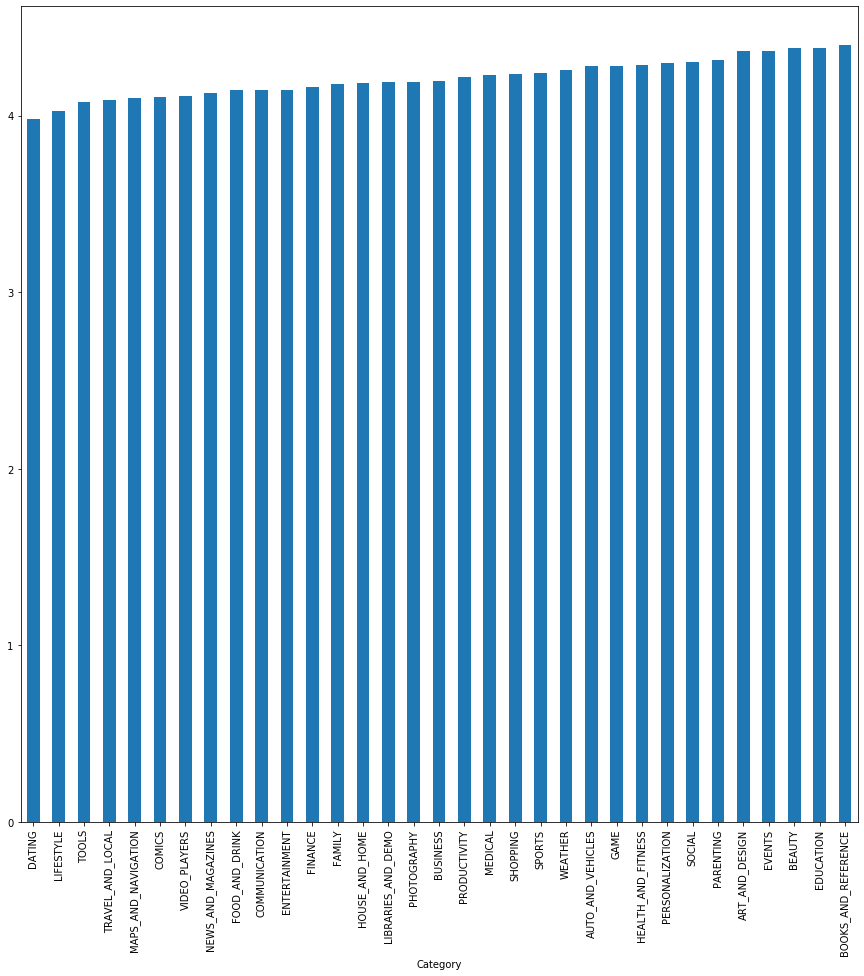

In [22]:
q1_df.groupby('Category').Rating.mean().sort_values().plot(kind='bar', figsize = (15,15))

# Question 2:
Is there a relationship between ratings and size? How did you measure the relationship? Why did you choose this measurement? 

Please create a scatterplot of size vs ratings to demonstrate the relationship or lack thereof. 

No, the correlation coefficient between ratings and size was 0.07.
First the data was split between Megabytes and kilobytes so we decided to few kilobyte sized apps and only measure the megabyte size apps. We used the correlation coefficient which returns a number -1 to 1. The closer to 1 or -1 the stronger the two variables are related. Our value of 0.07 is an extremely weak trend.



Text(0, 0.5, 'Rating')

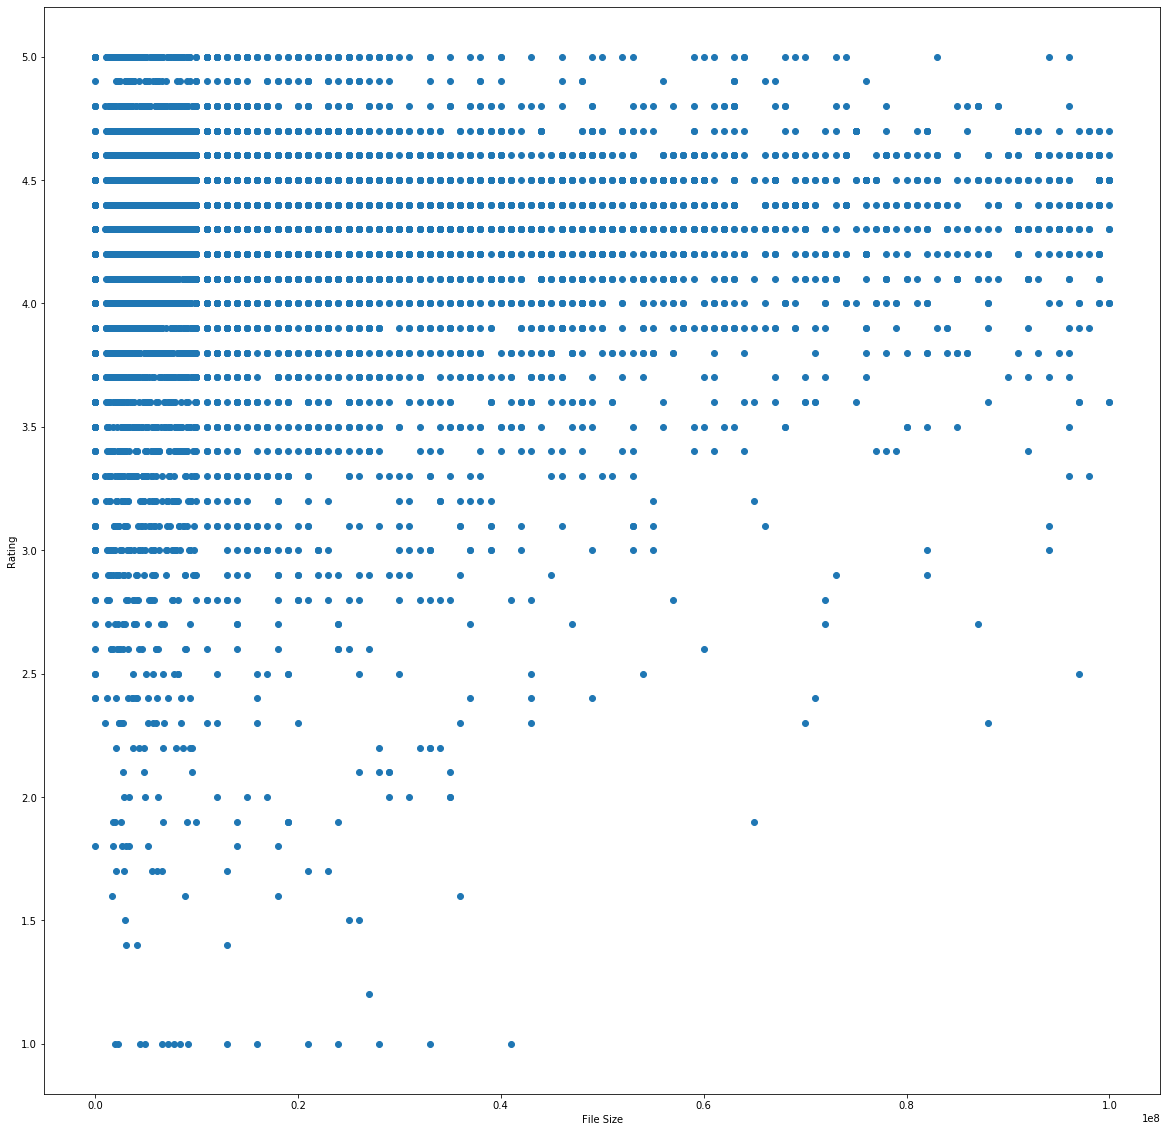

In [23]:
plt.figure(figsize = (20,20))
plt.scatter(df['Size'], df['Rating'])
plt.xlabel('File Size')
plt.ylabel('Rating')

# For this next section, choose a Category of playstore apps

## Category Chosen: [Family]



# Question 3:
For your category, how many genres are represented? What are their counts? Please show this with a bar chart. 

App               1832
Category          1832
Rating            1617
Reviews           1832
Size              1832
Installs          1832
Type              1832
Price             1832
Content Rating    1832
Genres            1832
Last Updated      1832
Current Ver       1829
Android Ver       1832
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002E1B541CD30>,
      dtype=object)

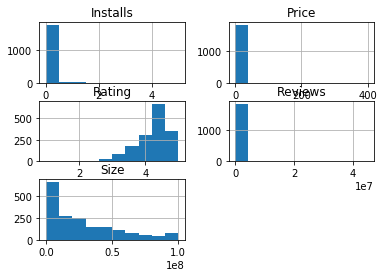

In [31]:
select_family = df.loc[df['Category'] == 'FAMILY']
print(select_family.count())
select_family.hist()

# Question 4:
What is something interesting you found about your category? 

Top App in the Family Category EC Dictionary which is a Chinese to English dictionary app



In [32]:
select_family.max()

App                                         中国語 AQリスニング
Category                                         FAMILY
Rating                                                5
Reviews                                     4.48814e+07
Size                                              1e+08
Installs                                      500000000
Type                                               Paid
Price                                            399.99
Content Rating                                  Unrated
Genres            Video Players & Editors;Music & Video
Last Updated                        2018-08-07 00:00:00
Android Ver                          Varies with device
dtype: object

# Question 5:
What is something interesting you found about your category in relationship to the rest of the data? 

Family has the most count of applications compared to other categories.

Text(0.5, 1.0, 'Count of apps in each category')

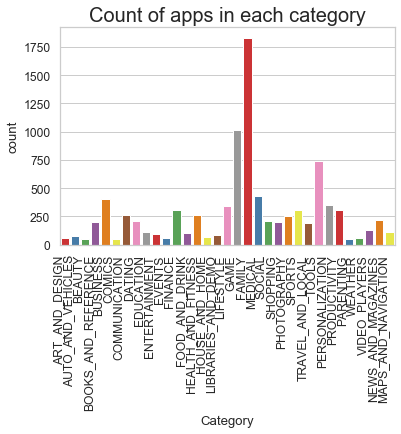

In [184]:
g = sns.countplot(x="Category",data=df, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Count of apps in each category',size = 20)

# Question 6:
Anything else we should know about this dataset?

Average of rating of application in store is around 4 which is very high

C:\Users\saifk\anaconda3\envs\learn-env\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\saifk\anaconda3\envs\learn-env\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0.5, 1.0, 'Distribution of Rating')

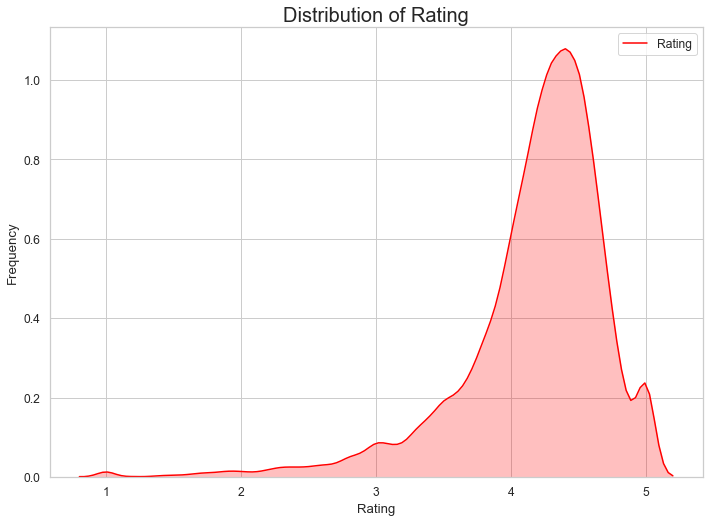

In [123]:
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(df.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

Percentage of Free Apps in store

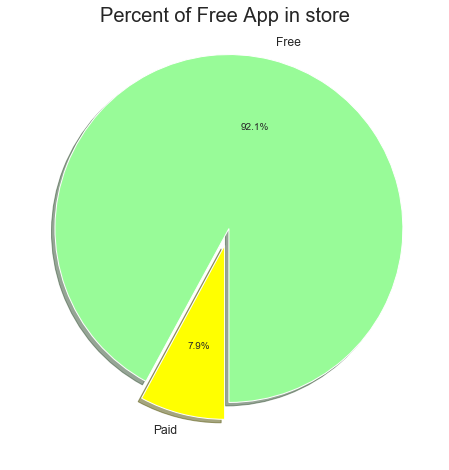

In [141]:
labels =df['Type'].value_counts(sort = True).index
sizes = df['Type'].value_counts(sort = True)


colors = ["palegreen","yellow"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 8,8

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270)

plt.title('Percent of Free App in store',size = 20)
plt.show()

Percentage of Free Apps in store is 92.1% and paid apps is 7.9%. Highest cost for  a paid app is 400$ 

In [190]:
df['Price'].describe()

count    9145.000000
mean        1.184366
std        17.355754
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [234]:
price_app = df.loc[df["Price"]==400]

In [235]:
price_app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7300000.0,10000,Paid,400.0,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up
